# Combine Fraction Infectivity/CSV Data **Per Experiment**
this will allow us to easily plot curves and IC50s in 1 notebook down the line
we want to have two replicates per experiment *type* then these experiment type fraction infectivity files will be used down the line to make seperate curves per replicate and calculate IC50s per replicate and geom means for both replicates.

# Imports

In [7]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
os.chdir('/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut') #sets working directory to repo/project root folder


Using `neutcurve` version 2.1.0


ModuleNotFoundError: No module named 'theme'

## Read in all fract_infect files and combine by column 
this will be subsetted below for each experiment 'type'
will also be helpful to get a list of date, virus, sera combinations 

In [39]:
# Define the folder containing the CSV files
folder_path = "frac_infect"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file and read it into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

# Optionally save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_frac_infect/all_fraction_infectivities.csv", index=False)

                                    serum              virus  replicate  \
0      Pooled Sera Depleted with A2 preF            RSV Long          1   
1      Pooled Sera Depleted with A2 preF            RSV Long          1   
2      Pooled Sera Depleted with A2 preF            RSV Long          1   
3      Pooled Sera Depleted with A2 preF            RSV Long          1   
4      Pooled Sera Depleted with A2 preF            RSV Long          1   
...                                   ...                ...        ...   
12271                                87_9  Influenza H3 1982          2   
12272                                87_9  Influenza H3 1982          2   
12273                                87_9  Influenza H3 1982          2   
12274                                87_9  Influenza H3 1982          2   
12275                                87_9  Influenza H3 1982          2   

       concentration well_id            plate_name        experiment_rep  \
0           0.025000   

In [40]:
# Convert unique values into a DataFrame
combined_df['virus'] = combined_df['virus'].str.strip()
unique_viruses_df = pd.DataFrame(combined_df['virus'].unique(), columns=['Unique Virus Names'])

# Print as a table without row numbers
print(unique_viruses_df.to_string(index=False))

print(combined_df['virus'].unique())

Unique Virus Names
          RSV Long
        RSV A 2020
        RSV B 2024
            RSV A2
       RSV B N201S
       RSV B N201T
      N201S H Neat
       N201S H 1-4
       N201S H 1-8
      B1982 H Neat
       B1982 H 1-4
       B1982 H 1-8
        RSV B 1982
        RSV B 1992
        RSV B 2019
 Influenza H3 2022
 Influenza H3 1982
        RSV B K68Q
        RSV A 1982
            RSV B1
               VSV
['RSV Long' 'RSV A 2020' 'RSV B 2024' 'RSV A2' 'RSV B N201S' 'RSV B N201T'
 'N201S H Neat' 'N201S H 1-4' 'N201S H 1-8' 'B1982 H Neat' 'B1982 H 1-4'
 'B1982 H 1-8' 'RSV B 1982' 'RSV B 1992' 'RSV B 2019' 'Influenza H3 2022'
 'Influenza H3 1982' 'RSV B K68Q' 'RSV A 1982' 'RSV B1' 'VSV']


## **mAb**

In [41]:
subset_df_mAb_1 = combined_df[combined_df['experiment_rep'] == 'mAb_1']
subset_df_mAb_1.head(5)
subset_df_mAb_1.to_csv("combined_frac_infect/mAb1_frac_infect.csv")

In [42]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_mAb_1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: overflow encountered in power
 

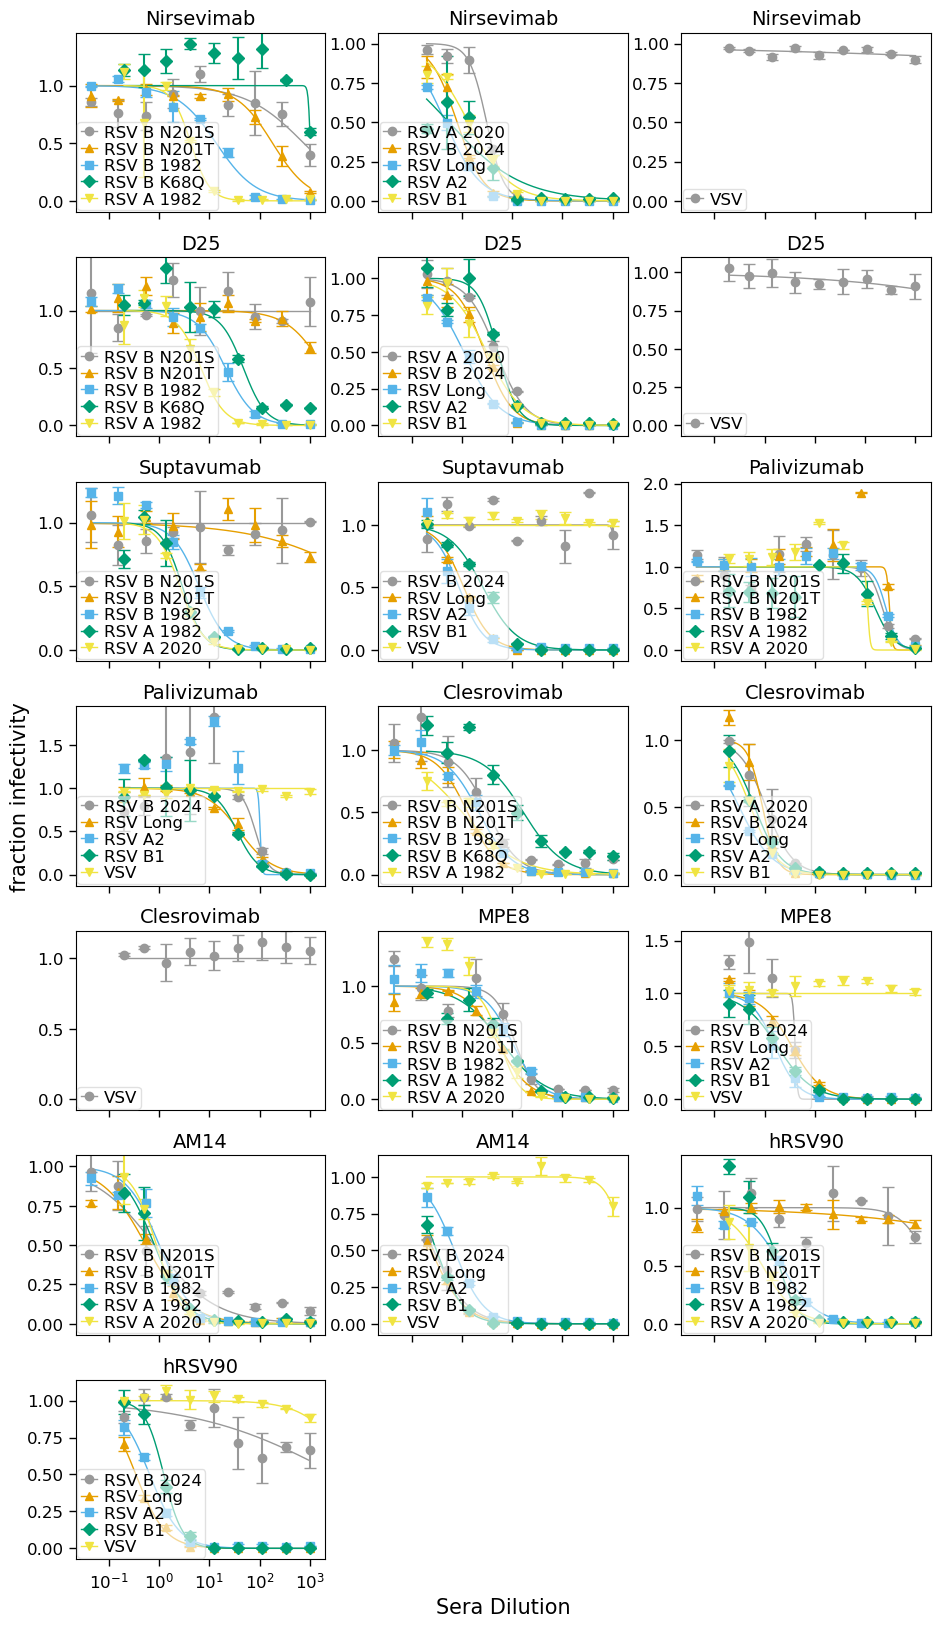

In [43]:
fig,axes = fits.plotSera(
            xlabel='Sera Dilution', 
            draw_in_bounds=True, ncol=3, sharey=False,
)
#fig.savefig('03_output/plots/250109_RSVA2_ForCaleb.pdf', dpi=100, bbox_inches='tight')

In [44]:
subset_df_mAb_2 = combined_df[combined_df['experiment_rep'] == 'mAb_2']
subset_df_mAb_2.head(5)
subset_df_mAb_2.to_csv("combined_frac_infect/mAb2_frac_infect.csv")

In [45]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_mAb_2,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimat

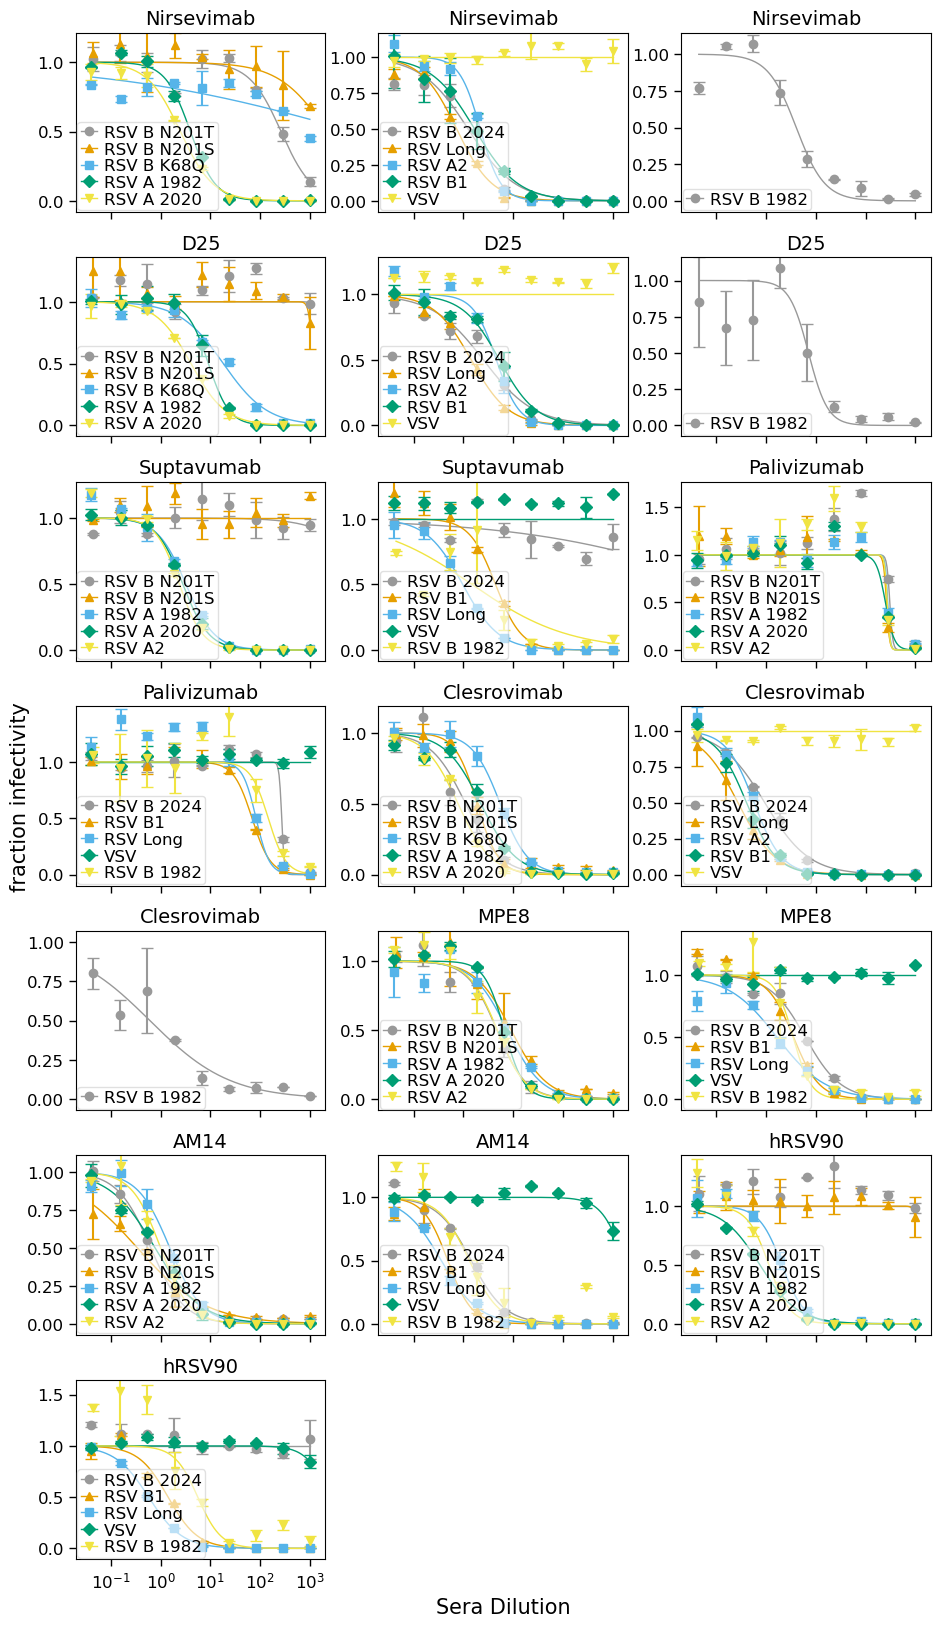

In [46]:
fig,axes = fits.plotSera(
            xlabel='Sera Dilution', 
            draw_in_bounds=True, ncol=3, sharey=False,
)
#fig.savefig('03_output/plots/250109_RSVA2_ForCaleb.pdf', dpi=100, bbox_inches='tight')

## **Greninger**

In [47]:
subset_df_Gren1 = combined_df[combined_df['experiment_rep'] == 'Greninger_1']
subset_df_Gren1.head(5)
subset_df_Gren1.to_csv("combined_frac_infect/Gren1_frac_infect.csv")

In [48]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_Gren1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

In [49]:
subset_df_Gren2 = combined_df[combined_df['experiment_rep'] == 'Greninger_2']
subset_df_Gren2.head(5)
subset_df_Gren2.to_csv("combined_frac_infect/Gren2_frac_infect.csv")

In [50]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_Gren2,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

## **Historical sera, RSV**

In [51]:
subset_df_RSV_Historical_Sera_1 = combined_df[combined_df['experiment_rep'] == 'RSV_Historical_Sera_1']
subset_df_RSV_Historical_Sera_1.head(5)
subset_df_RSV_Historical_Sera_1.to_csv("combined_frac_infect/RSV_Historical_Sera_1_frac_infect.csv")

In [52]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_RSV_Historical_Sera_1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

In [53]:
subset_df_RSV_Historical_Sera_2 = combined_df[combined_df['experiment_rep'] == 'RSV_Historical_Sera_2']
subset_df_RSV_Historical_Sera_2.head(5)
subset_df_RSV_Historical_Sera_2.to_csv("combined_frac_infect/RSV_Historical_Sera_2_frac_infect.csv")

In [54]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_RSV_Historical_Sera_2,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

## **Historical sera, FLU**

In [55]:
subset_df_H3_Historical_Sera_1 = combined_df[combined_df['experiment_rep'] == 'H3_Historical_Sera_1']
subset_df_H3_Historical_Sera_1.head(5)
subset_df_H3_Historical_Sera_1.to_csv("combined_frac_infect/H3_Historical_Sera_1_frac_infect.csv")

In [56]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_H3_Historical_Sera_1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

In [57]:
subset_df_H3_Historical_Sera_2 = combined_df[combined_df['experiment_rep'] == 'H3_Historical_Sera_2']
subset_df_H3_Historical_Sera_2.head(5)
subset_df_H3_Historical_Sera_2.to_csv("combined_frac_infect/H3_Historical_Sera_2_frac_infect.csv")

In [58]:
fits = neutcurve.curvefits.CurveFits(
            data=subset_df_RSV_Historical_Sera_1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])